<a href="https://colab.research.google.com/github/gabychoi/comment-clean-bot/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np 
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import glob
import re

from tqdm import tqdm_notebook

In [3]:
# 크롤링한 전체 댓글 데이터 불러오기
repl_data = pd.read_csv('/content/gdrive/My Drive/eda_data/repl_data.csv')

,Unnamed: 0,Unnamed: 0.1,댓글,출처
0,0,0,🗣,./data\JTBCNEWS_인스타_댓글_1116.csv
1,1,1,"심각허다,, 법안 검토도 안 하는 의원들 내 세금으로 호의호식 한다 생각하니까 열받...",./data\JTBCNEWS_인스타_댓글_1116.csv
2,2,2,"차도에서 25km제한 둠 어쩌자는건지 자전거 오토바이도 그거보다 빠르다 인도, 차도...",./data\JTBCNEWS_인스타_댓글_1116.csv
3,3,3,국회의원직 다 박탈했으면 좋겠네ㅠㅠ,./data\JTBCNEWS_인스타_댓글_1116.csv
4,4,4,표 얻을 생각 말고 법을 만들어라,./data\JTBCNEWS_인스타_댓글_1116.csv
...,...,...,...,...
127120,968,968,🇧🇻🇰🇷❤️❤️❤️,./data\홍석천.csv
127121,969,969,이건... 홍마담에서 구입 못하나요? ㅎㅎㅎ,./data\홍석천.csv
127122,970,970,느무 잘먹는 예 9,./data\홍석천.csv
127123,971,971,"맛있는건 눈으로만 봐도 알죠,맛있게 드세요",./data\홍석천.csv


In [40]:
# 댓글 길이 확인
repl_data['댓글길이'] = repl_data['댓글'].apply(lambda x : len(str(x)))

repl_data['댓글길이'].max()

2229

In [6]:
# 댓글길이 시각화

import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
len_int = repl_data['댓글길이'].astype(int)
len_sort = len_int.sort_values()
sort_df = pd.DataFrame(len_sort)

len_count = pd.DataFrame(sort_df.groupby(['댓글길이']).size())
len_count.columns = ['댓글개수']
len_count



,댓글개수
댓글길이,
1,1468
2,1779
3,1889
4,1669
5,2117
...,...
1931,1
1958,1
2071,1


In [64]:
len_count.reset_index(level=0, inplace=True)

In [65]:
len_count

,댓글길이,댓글개수
0,1,1468
1,2,1779
2,3,1889
3,4,1669
4,5,2117
...,...,...
830,1931,1
831,1958,1
832,2071,1
833,2190,1


In [44]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

Unknown system... sorry~~~~


In [69]:
import matplotlib as mpl
%matplotlib inline

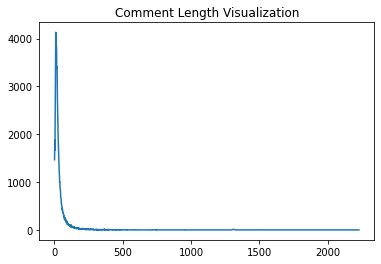

In [72]:
plt.title('Comment Length Visualization')
plt.plot(len_count['댓글길이'], len_count['댓글개수']) #앞이 x축, 뒤가 y축
# plt.xlabel('댓글길이')
# plt.ylabel('댓글개수')
plt.show()

In [47]:
len_count.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 835 entries, 1 to 2229
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   댓글 개수   835 non-null    int64
dtypes: int64(1)
memory usage: 13.0 KB


In [88]:
repl_data

,Unnamed: 0,Unnamed: 0.1,댓글,출처,댓글길이
0,0,0,🗣,./data\JTBCNEWS_인스타_댓글_1116.csv,1
1,1,1,"심각허다,, 법안 검토도 안 하는 의원들 내 세금으로 호의호식 한다 생각하니까 열받...",./data\JTBCNEWS_인스타_댓글_1116.csv,66
2,2,2,"차도에서 25km제한 둠 어쩌자는건지 자전거 오토바이도 그거보다 빠르다 인도, 차도...",./data\JTBCNEWS_인스타_댓글_1116.csv,137
3,3,3,국회의원직 다 박탈했으면 좋겠네ㅠㅠ,./data\JTBCNEWS_인스타_댓글_1116.csv,19
4,4,4,표 얻을 생각 말고 법을 만들어라,./data\JTBCNEWS_인스타_댓글_1116.csv,18
...,...,...,...,...,...
127120,968,968,🇧🇻🇰🇷❤️❤️❤️,./data\홍석천.csv,10
127121,969,969,이건... 홍마담에서 구입 못하나요? ㅎㅎㅎ,./data\홍석천.csv,24
127122,970,970,느무 잘먹는 예 9,./data\홍석천.csv,10
127123,971,971,"맛있는건 눈으로만 봐도 알죠,맛있게 드세요",./data\홍석천.csv,23


In [96]:
# 댓글길이 300이상 500이하
repl_data = repl_data[(repl_data['댓글길이'] <= 500) & (repl_data['댓글길이'] >= 300)]
repl_data

,Unnamed: 0,Unnamed: 0.1,댓글,출처,댓글길이
20,20,20,화재는 원인 조사를 통한 예방이 최선입니다 그래도 소방청 통계로 매일 발생하는 화재...,./data\JTBCNEWS_인스타_댓글_1116.csv,444
21,21,21,다들 비슷한 경험을 하실겁니다 오작동 화재감지기 덕에 스프링클러 연동 차단하고(화재...,./data\JTBCNEWS_인스타_댓글_1116.csv,369
23,23,23,문재인 대통령님 화재시 반복되는 연기와 유독가스에 의한 질식사가 전체 사망자의 70...,./data\JTBCNEWS_인스타_댓글_1116.csv,426
616,616,616,"본 언론사의 기사에서 아르메니아인들이 한국으로 부터 도움을 구하고 있으며, 방탄소년...",./data\JTBCNEWS_인스타_댓글_1116.csv,365
617,617,617,"본 언론사의 기사에서 아르메니아인들이 한국으로 부터 도움을 구하고 있으며, 방탄소년...",./data\JTBCNEWS_인스타_댓글_1116.csv,365
...,...,...,...,...,...
124827,458,458,다들 방송이란게 그렇습니다. 다그대로 찍는다고 방송마음대로 다 그대로 내보내지 않아...,./data\함소원.csv,349
125068,699,699,일을 조금이라도 줄이시고 혜정이와 함께하는 시간을 좀 더 늘리는게 어떨까요? 돈도 ...,./data\함소원.csv,400
125073,704,704,음.. 저도 아기엄마지만 일하면서 키우는데 다른건 몰라도 아이 아플땐 엄마 밖에 없...,./data\함소원.csv,319
126620,468,468,제이야기를 해볼까 합니다 저는 지금호흡기2급 장애를 가지고 살아가고 있습니다 199...,./data\홍석천.csv,327


In [97]:
len_int = repl_data['댓글길이'].astype(int)
len_sort = len_int.sort_values()
sort_df = pd.DataFrame(len_sort)

len_count = pd.DataFrame(sort_df.groupby(['댓글길이']).size())
len_count.columns = ['댓글개수']
len_count


,댓글개수
댓글길이,
300,11
301,7
302,5
303,7
304,7
...,...
496,2
497,2
498,3


In [98]:
len_count.reset_index(level=0, inplace=True)

In [99]:
len_count

,댓글길이,댓글개수
0,300,11
1,301,7
2,302,5
3,303,7
4,304,7
...,...,...
188,496,2
189,497,2
190,498,3
191,499,1


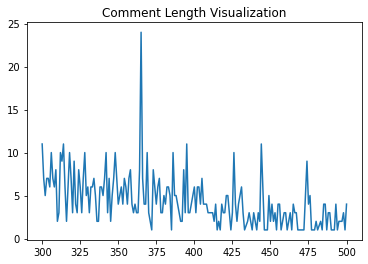

In [100]:
plt.title('Comment Length Visualization')
plt.plot(len_count['댓글길이'], len_count['댓글개수']) #앞이 x축, 뒤가 y축
# plt.xlabel('댓글길이')
# plt.ylabel('댓글개수')
plt.show()